In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens')
from importlib import reload
from astropy.cosmology import Planck15 as cosmo
from astropy.cosmology import default_cosmology
from astropy import units
import astropy
import time

import psutil
from distributed.utils import format_bytes

#only for python3
import importlib
reload=importlib.reload

In [4]:
ii=np.arange(10)

In [9]:
[(i,j) for i in ii for j in np.arange(i,10)]

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 8),
 (8, 9),
 (9, 9)]

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False

In [3]:
from skylens import *
# from fisher import *
from PCA_shear import *

In [4]:
import PCA_shear
reload(PCA_shear)
from PCA_shear import *

In [5]:
import skylens
reload(skylens)
from skylens import *

In [6]:
import survey_utils
reload(survey_utils)
from survey_utils import *

In [7]:
fig_home='./figures/'
fig_format='pdf'

In [37]:
log(5000)/log(1000)

1.2329900014453397

In [8]:
fname='../tests/fisher/cl_cov_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    cov_cl=pickle.load(of)

In [9]:
fname='../tests/fisher/fisher_5_5_17_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
# fname='../tests/fisher/fisher_2_2_4_nlb10_lmax1000_z0.1-3.5_bary0.pkl'
with open(fname,'rb') as of:
    fishes=pickle.load(of)

In [10]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [11]:
f_nz_all_lsst=fishes['f_nz_all_lsst']
f_nz0=fishes['f_nz0']
f_nz_all=fishes['f_nz_all']


In [12]:
import plot_fisher_tool
reload(plot_fisher_tool)
from plot_fisher_tool import *

In [13]:
f_nz_all_lsst['params'].shape

(234,)

In [14]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'prior', 'cov_p', 'error', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

In [15]:
x=np.isfinite(f_nz_all['cov'])
x.mean()

1.0

In [16]:
fishes.keys()

dict_keys(['priors', 'f0', 'f_nz0', 'f_all', 'f_nz_all', 'f_all_lsst', 'f_nz_all_lsst', 'cov_file', 'cosmo_fid'])

In [17]:
f_nz_all['x_vars']['Om']

array([0.304425, 0.310575])

In [18]:
f_nz_all['model']['Om'][0]

array([5.78605702e-08, 3.77346379e-08, 2.47200526e-08, ...,
       3.23024982e-09, 2.10622242e-09, 1.39526640e-09])

In [19]:
error=np.sqrt(np.diag(f_nz_all['cov']))
corr=f_nz_all['cov']/np.outer(error,error)

In [20]:
np.linalg.det(f_nz_all['cov_p_inv'])

-0.0

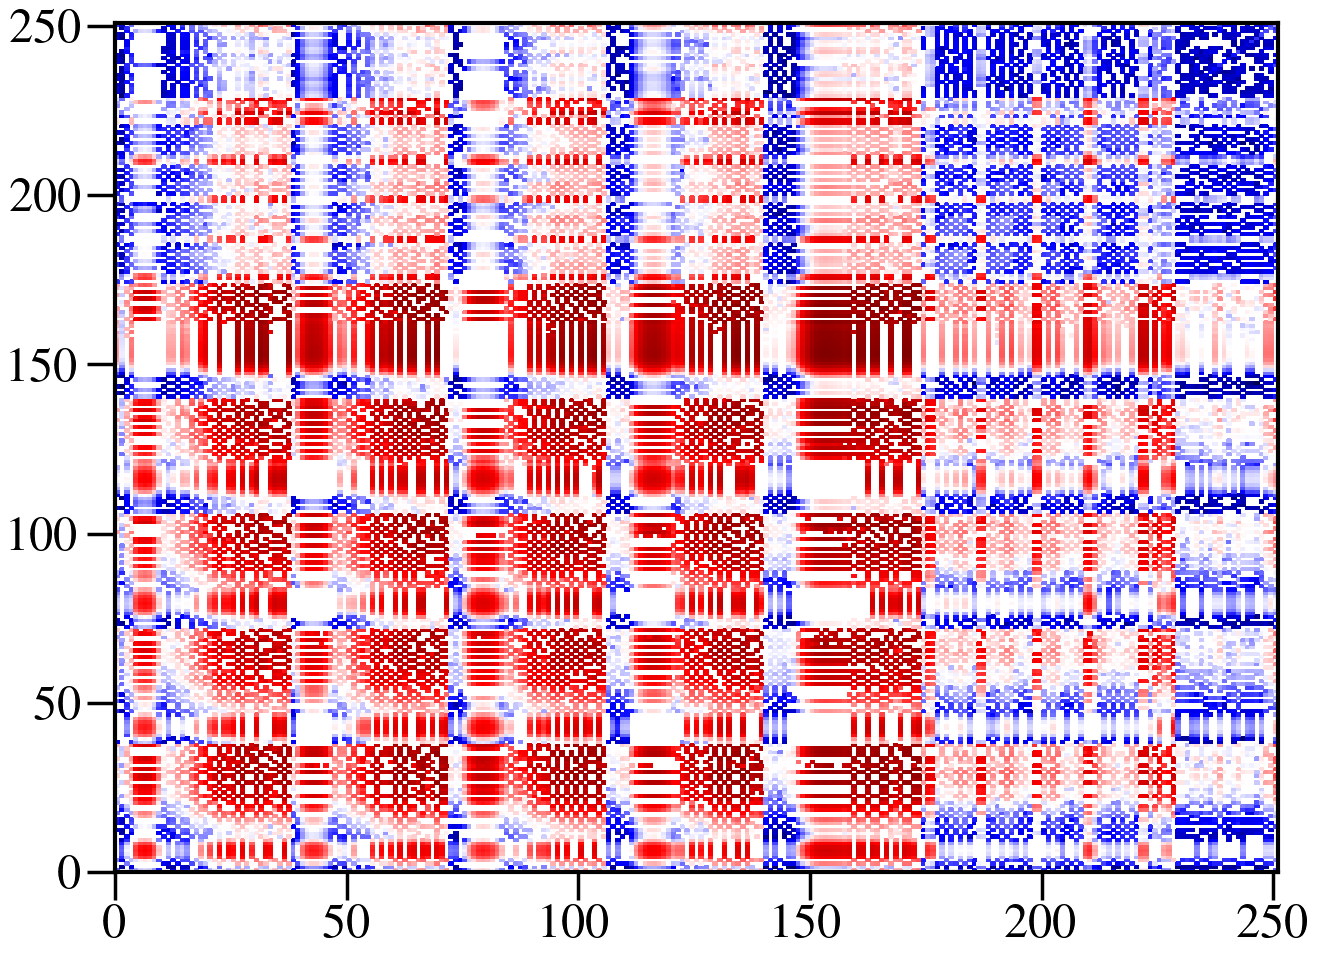

In [34]:
pcolor(f_nz_all['cov_p'],cmap='seismic',norm=LogNorm())

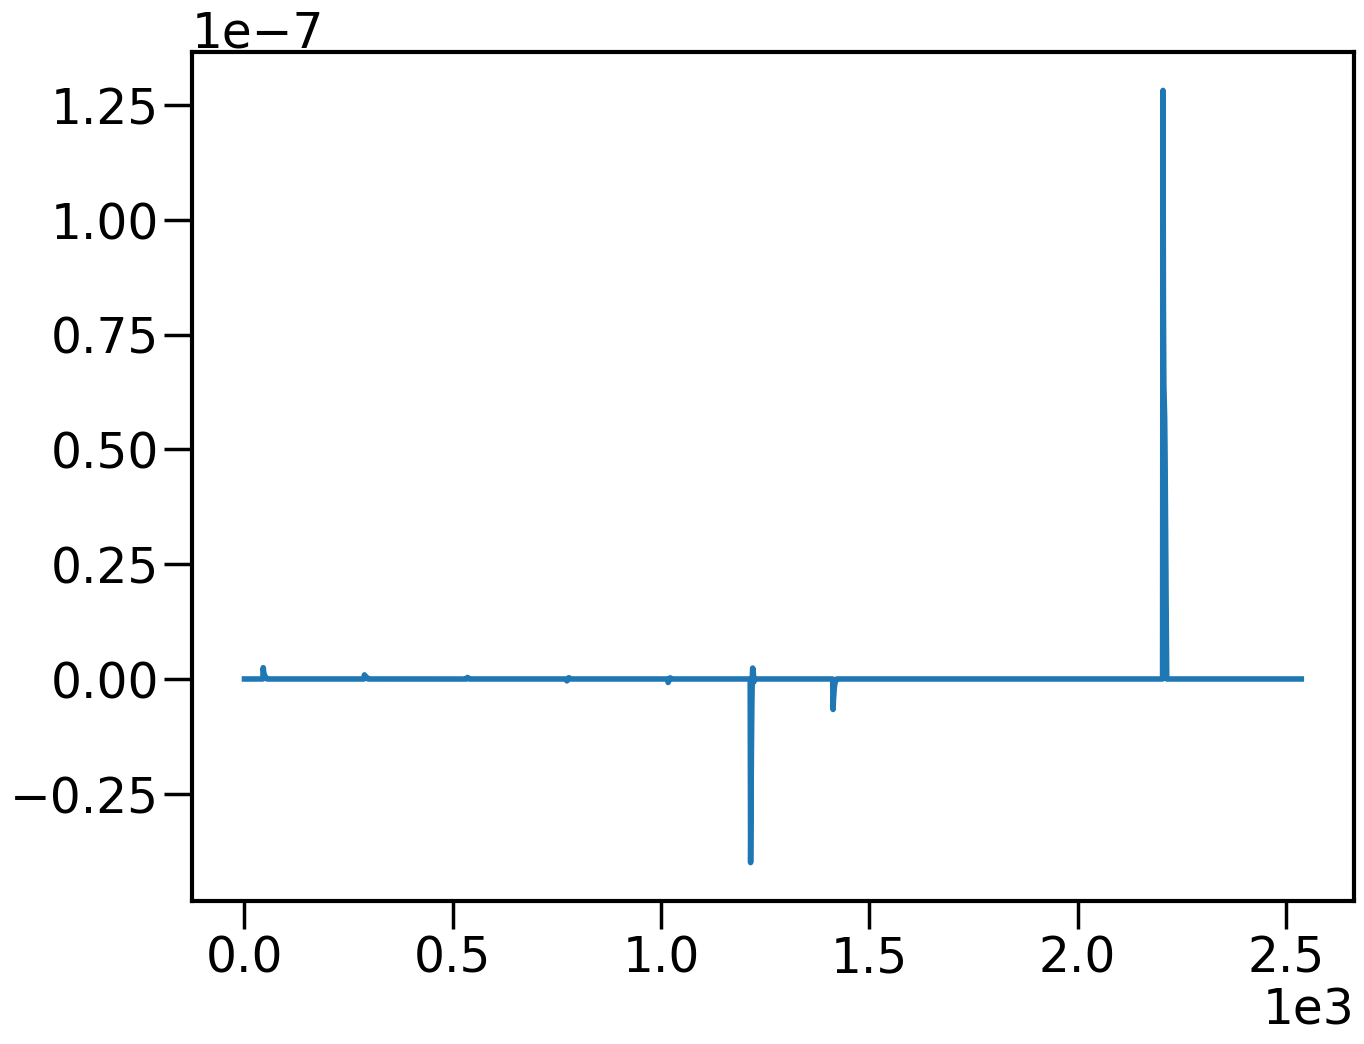

In [22]:
_=plot(f_nz_all['model_deriv']['nz_l_0_0'])#.keys()

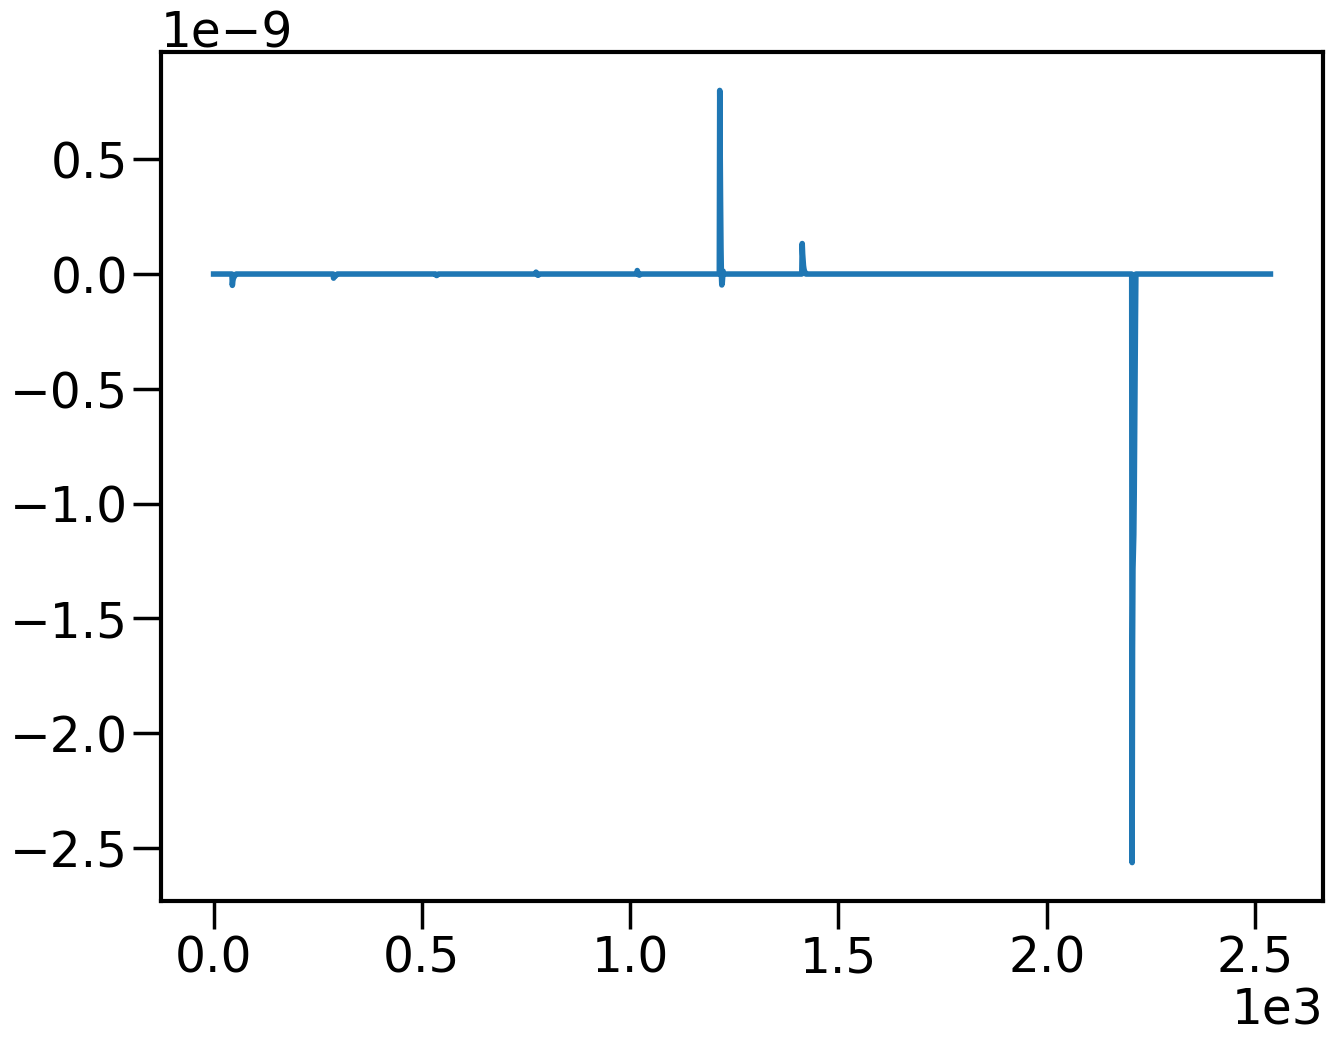

In [23]:
_=plot(f_nz_all['model']['nz_l_0_0'][0]-f_nz_all['model']['nz_l_0_0'][1])

In [24]:
dd=np.diag(f_nz_all['cov_p_inv'])
x=np.isclose(dd,0)
f_nz_all['params'][x], x.sum()

(array([], dtype='<U32'), 0)

(200.0, 300.0)

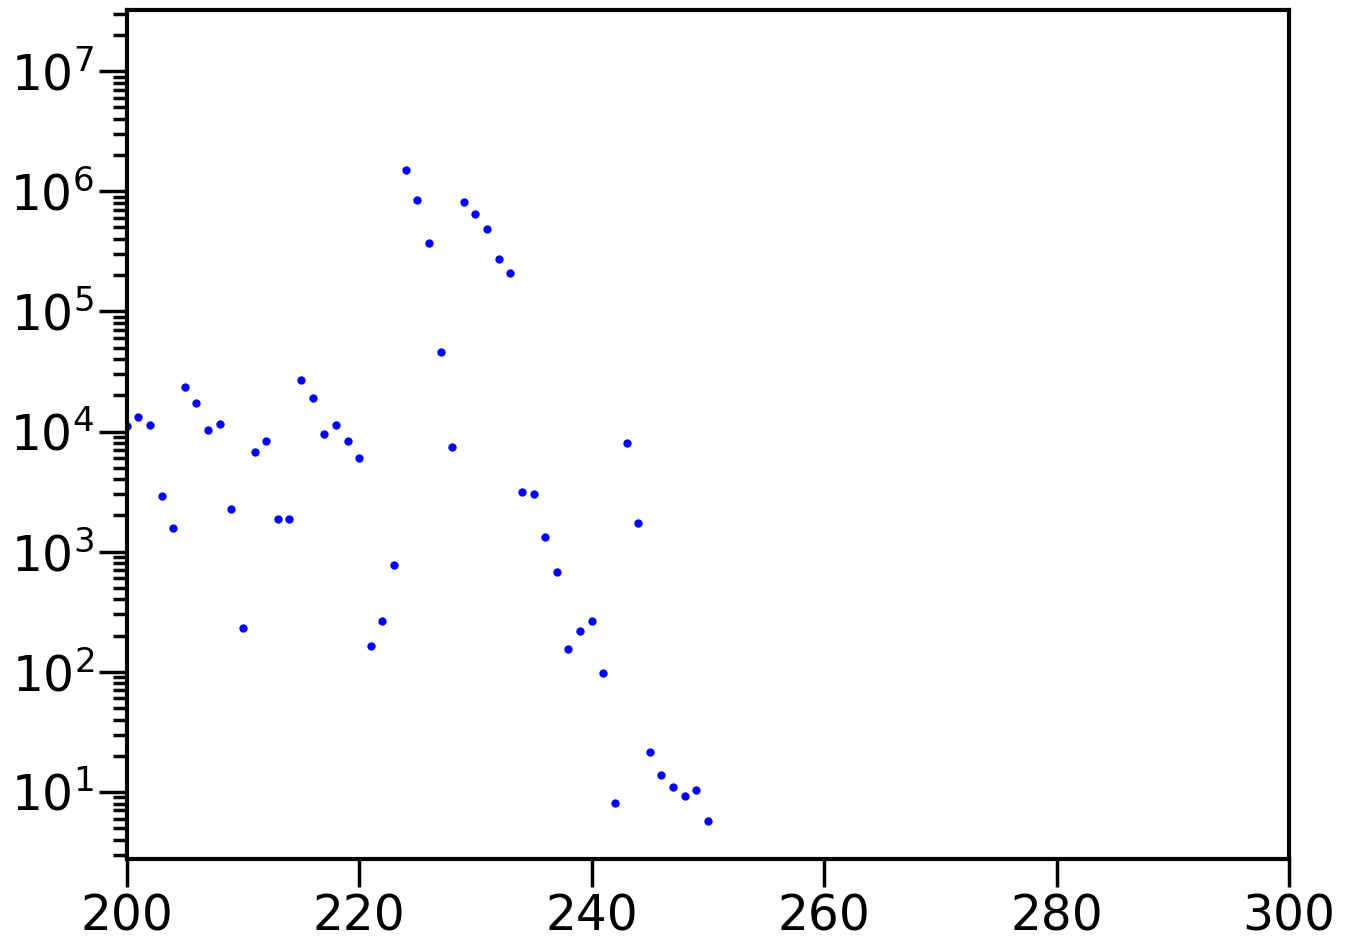

In [25]:
plot(dd,'b.')
# loglog()
yscale('log')
xlim(200,300)

In [26]:
f_nz_all.keys()

dict_keys(['cov_p_inv', 'params_all', 'prior', 'cov_p', 'error', 'cov_deriv', 'model_deriv', 'cov', 'cov_inv', 'model', 'x_vars', 'params'])

(1.0, 1.5)

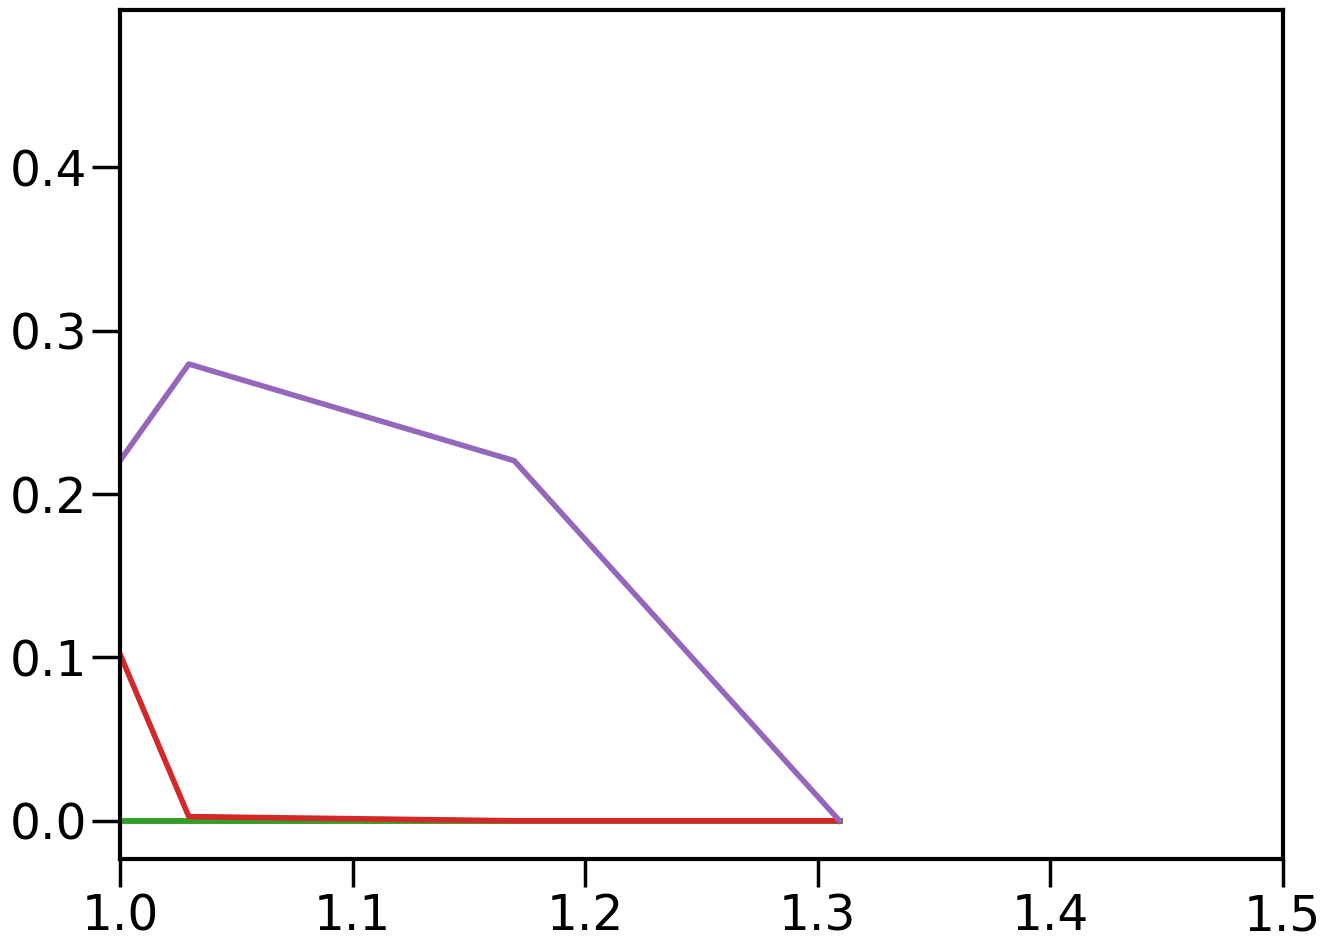

In [28]:
zb=cov_cl['z_bins']
for i in np.arange(5):
# plot(z_bins_kwargs['zs_bins'][i]['z'],pp_s[i],'--')
    plot(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz'])
#     fill_between(zb['zl_bins'][i]['z'],zb['zl_bins'][i]['nz']-pp_l[i],zb['zl_bins'][i]['nz']+pp_l[i],alpha=0.2)
# yscale('log')
# xscale('log')
xlim(1,1.5)

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


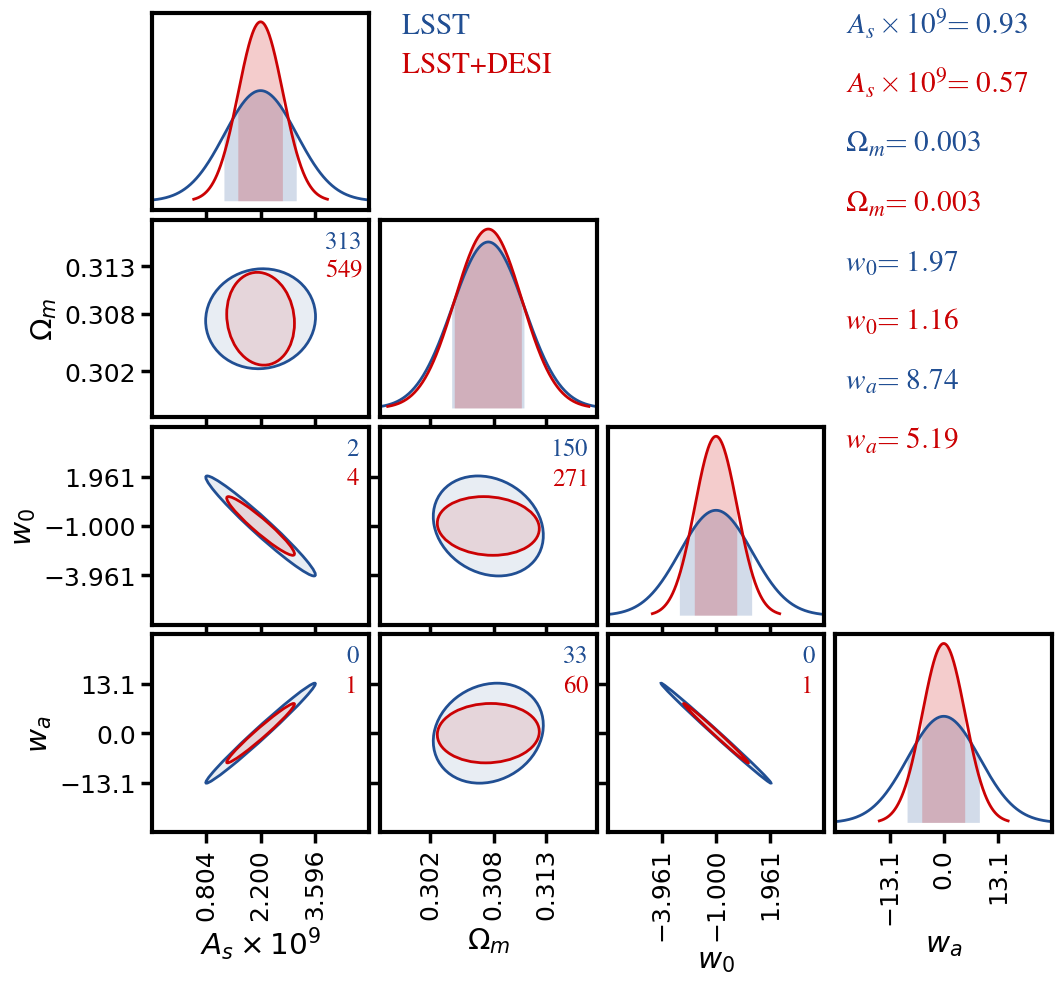

In [29]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


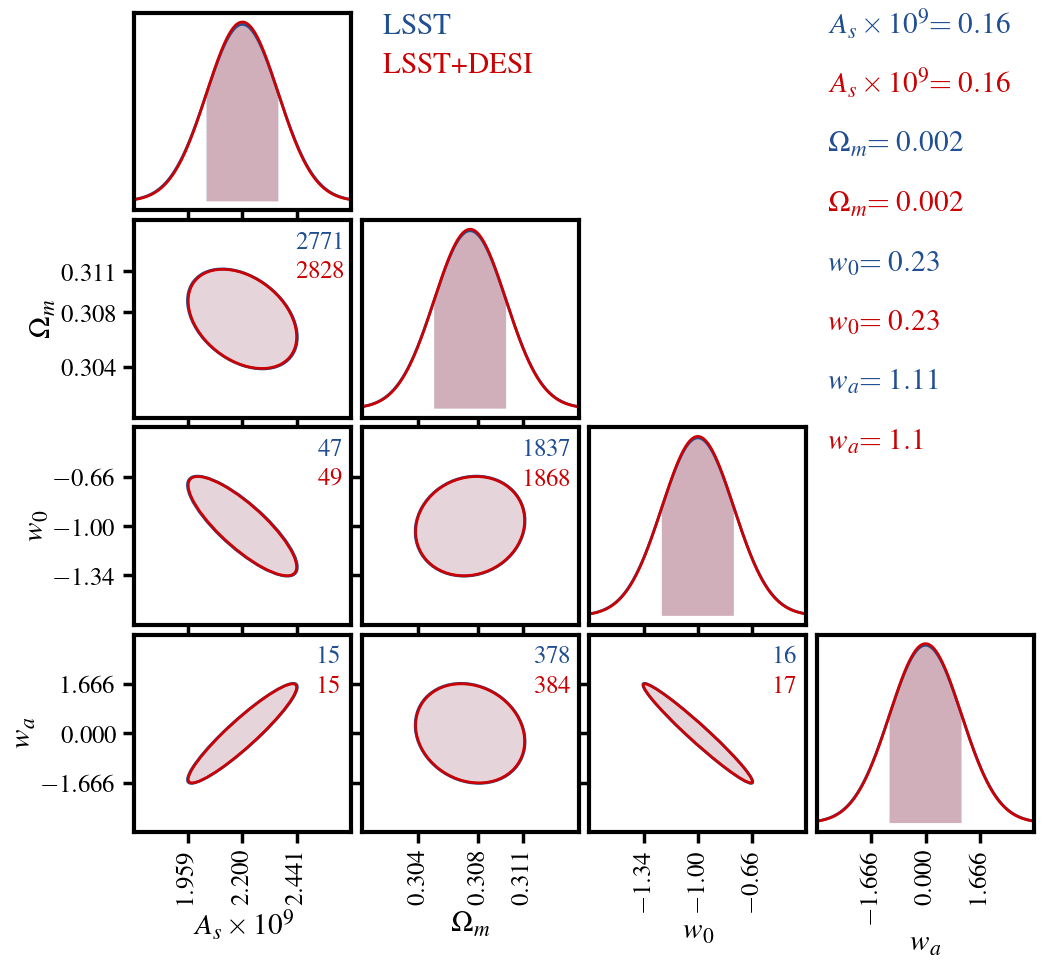

In [32]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['prior']['cov_p_inv'],1:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI'})
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

../skylens/plot_fisher_tool.py:74: RuntimeWarning: invalid value encountered in sqrt
  self.par_sigma1D[i] = np.sqrt(np.diag(self.Cov_par[i]))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in sqrt
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: divide by zero encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))
../skylens/plot_fisher_tool.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.Corr_par[i]=self.Cov_par[i]/np.sqrt(np.outer(diag,diag))


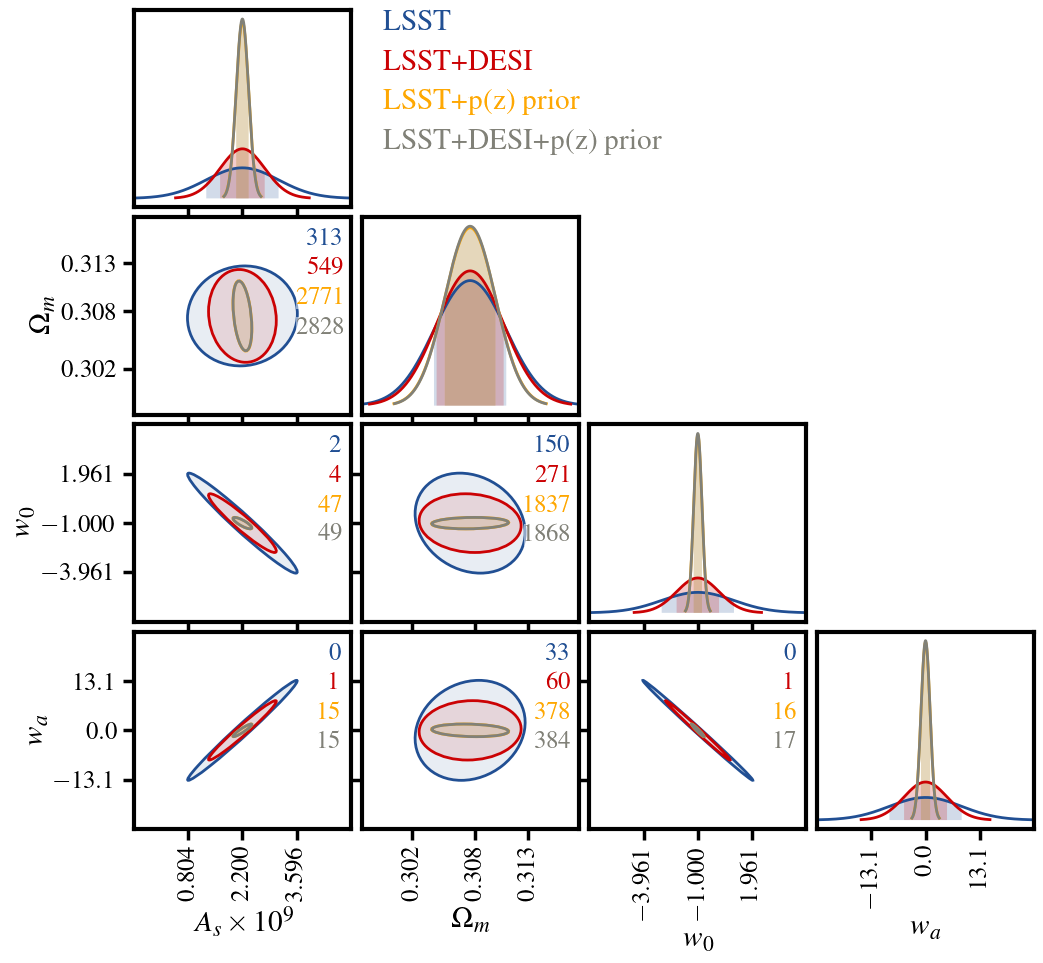

In [33]:
fish1 = fisher_tool(Fishers={0:f_nz_all_lsst['cov_p_inv'],1:f_nz_all['cov_p_inv'],
                            2:f_nz_all_lsst['prior']['cov_p_inv'],3:f_nz_all['prior']['cov_p_inv']},
                    pars={0:f_nz_all_lsst['params'],1:f_nz_all['params'],
                         2:f_nz_all_lsst['params'],3:f_nz_all['params']},
                    par_cen=cosmo_fid#{'Om':0.28374511,'Ase9':0.80351633}
                    ,fisher_titles={0:'LSST',1:'LSST+DESI',
                                   2:'LSST+p(z) prior',3:'LSST+DESI+p(z) prior'},
                   print_par_error=False)
f=fish1.plot_fish(pars=['Ase9','Om','w','wa'])

In [ ]:
f_nz_all_lsst['model_deriv']['nz_s_0_17']